# Chapter 5: Presenting Data
In this chapter, we look at calculating basic statistical parameters and we show how to use histogram.
## 5.2 Basic statistical parameters
In example 5-1, we compute the basic parameters for a set of measurements

In [9]:
import numpy as np
import scipy.stats as stats
from math import *
#Copy the data from the book into a numpy array
xi=np.array([1.1, 1.2, 1.0, 1.3, 1.4, 1.5, 1.2, 1.3, 1.3, 1.1, 1.0, 1.6])
N=xi.size
#Use the numpy mean() function to get the mean:
xmean=xi.mean()
print("mean: {:.2f}".format(xmean))
#The variance (note that we have to specify ddof=1, which results in using the 
# N-1 in the denominator instead of N)
xvar=xi.var(ddof=1)
print("variance: {:.3f}".format(xvar))
#The standard deviation is either the square root of the variance, or we can
#get it from numpy
xstd=xi.std(ddof=1)
print("std. dev.: {:.3f}".format(xstd))
#The error on the mean
xmeanerr=xstd/sqrt(N)
print("error on the mean: {:.3f}".format(xmeanerr))

#Sort the array to make it easier to see the mode and median:
xi_sorted = np.sort(xi)
print("Sorted:",xi_sorted)
#The median can be found by:
xmedian=np.median(xi)
print("The median is:",xmedian)
#The mode must be found using the scipy.stats module
xmode,modecount=stats.mode(xi)
print("The mode is:",xmode[0])

mean: 1.25
variance: 0.035
std. dev.: 0.188
error on the mean: 0.054
Sorted: [ 1.   1.   1.1  1.1  1.2  1.2  1.3  1.3  1.3  1.4  1.5  1.6]
The median is: 1.25
The mode is: 1.3


Next, we look at calculating the covariance and correlation factors for a set of measurments in Example 5-2:

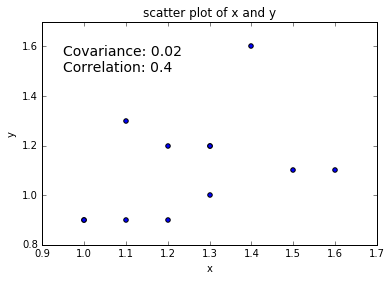

In [11]:
import numpy as np
import pylab as pl
%matplotlib inline
#copy the values into numpy arrays:
xi=np.array([1.1, 1.2, 1.0, 1.3, 1.4,1.5, 1.2, 1.3, 1.3, 1.1, 1.0, 1.6])
yi=np.array([1.3, 0.9, 0.9, 1.0, 1.6, 1.1, 1.2, 1.2, 1.2, 0.9, 0.9, 1.1])
#get the mean and standard deviations:
xmean=xi.mean()
ymean=yi.mean()
xstd=xi.std(ddof=1)
ystd=yi.std(ddof=1)
#calculate the covariance and correlation:
covxy=((xi-xmean)*(yi-ymean)).sum()/(xi.size-1)
corxy=covxy/xstd/ystd
#make some text with the results
text='''
Covariance: {:.2f}
Correlation: {:.1f}'''.format(covxy,corxy)
#plot these as a scatter plot, including the text
pl.scatter(xi,yi)
pl.xlabel('x')
pl.ylabel('y')
pl.title("scatter plot of x and y")
pl.text(0.95,1.5,text,fontsize=14)
pl.show()

## The histogram
A histogram is a very useful way to visualize a set of measurements. Making a histogranm of set of measurements is often the first step in trying to understand a distribution of measurements.


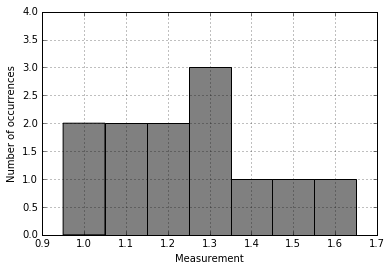

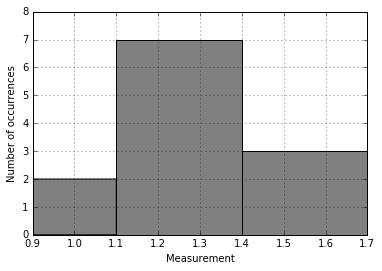

Bins used: [ 0.9  1.1  1.4  1.7]
Counts in each bin [ 2.  7.  3.]


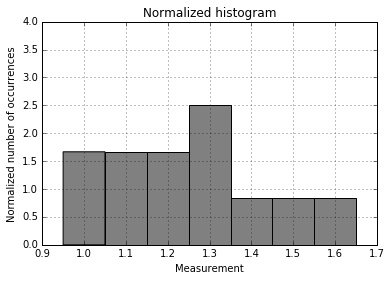

In [15]:
import numpy as np
import pylab as pl
#Make the histograms in Figures 5-2, 5-3, 5-4
#The data:
xi=np.array([1.1, 1.2, 1.0, 1.3, 1.4,1.5, 1.2, 1.3, 1.3, 1.1, 1.0, 1.6])

#Make a histogram with equal bin width and plot it:
#Here we specify the edges of the bins:
pl.hist(xi, bins=[0.95,1.05,1.15,1.25,1.35,1.45,1.55,1.65],color='gray')
pl.axis([0.9,1.7,0,4])
pl.grid()
pl.xlabel("Measurement")
pl.ylabel("Number of occurrences")
pl.show()

#Use 3 unequal bins which we specify
#Also get the number of counts in each bin:
n,bins,patches=pl.hist(xi, bins=[0.9,1.1,1.4,1.7],color='gray',normed=False)
pl.axis([0.9,1.7,0,8])
pl.grid()
pl.xlabel("Measurement")
pl.ylabel("Number of occurrences")
pl.show()
print("Bins used:",bins)
print("Counts in each bin",n)

#Use original binning, but normalize the histogram:
pl.hist(xi, bins=[0.95,1.05,1.15,1.25,1.35,1.45,1.55,1.65],color='gray', normed=True)
pl.axis([0.9,1.7,0,4])
pl.grid()
pl.xlabel("Measurement")
pl.ylabel("Normalized number of occurrences")
pl.title("Normalized histogram")
pl.show()